# Multi-class Classification Problem 

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/holoviz-topics/examples/main/penguin_crossfilter/penguins.csv'

In [2]:
df = pd.read_csv(url)
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,5,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
4,PAL0708,6,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN


In [3]:
print(f"number of rows: {df.shape[0]}")

number of rows: 333


In [4]:
print(f"number of columns: {df.shape[1]}")

number of columns: 17


The palmer penguins dataset has a total of 333 rows and 17 columns. 

# Extracting useful information

In [5]:
useful_information = df.describe()
useful_information

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,333.000000,333.000000,333.000000,333.000000,333.000000,324.000000,325.000000
mean,63.645646,43.992793,17.164865,200.966967,4207.057057,8.739944,-25.682842
std,40.201308,5.468668,1.969235,14.015765,805.215802,0.552073,0.796629
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,30.000000,39.500000,15.600000,190.000000,3550.000000,8.304440,-26.326010
50%,58.000000,44.500000,17.300000,197.000000,4050.000000,8.658585,-25.833520
75%,95.000000,48.600000,18.700000,213.000000,4775.000000,9.181477,-25.041690
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


Determining the datatype of each column in the palmer penguins dataset : 

In [6]:
data_types = df.dtypes

In [7]:
data_types

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

Missing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            333 non-null    object 
 1   Sample Number        333 non-null    int64  
 2   Species              333 non-null    object 
 3   Region               333 non-null    object 
 4   Island               333 non-null    object 
 5   Stage                333 non-null    object 
 6   Individual ID        333 non-null    object 
 7   Clutch Completion    333 non-null    object 
 8   Date Egg             333 non-null    object 
 9   Culmen Length (mm)   333 non-null    float64
 10  Culmen Depth (mm)    333 non-null    float64
 11  Flipper Length (mm)  333 non-null    float64
 12  Body Mass (g)        333 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    324 non-null    float64
 15  Delta 13 C (o/oo)    325 non-null    flo

In [9]:
df.isnull().sum() 
# If needed, the missing values could be imputed


studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)        9
Delta 13 C (o/oo)        8
Comments               313
dtype: int64

Distribution of the variables. 

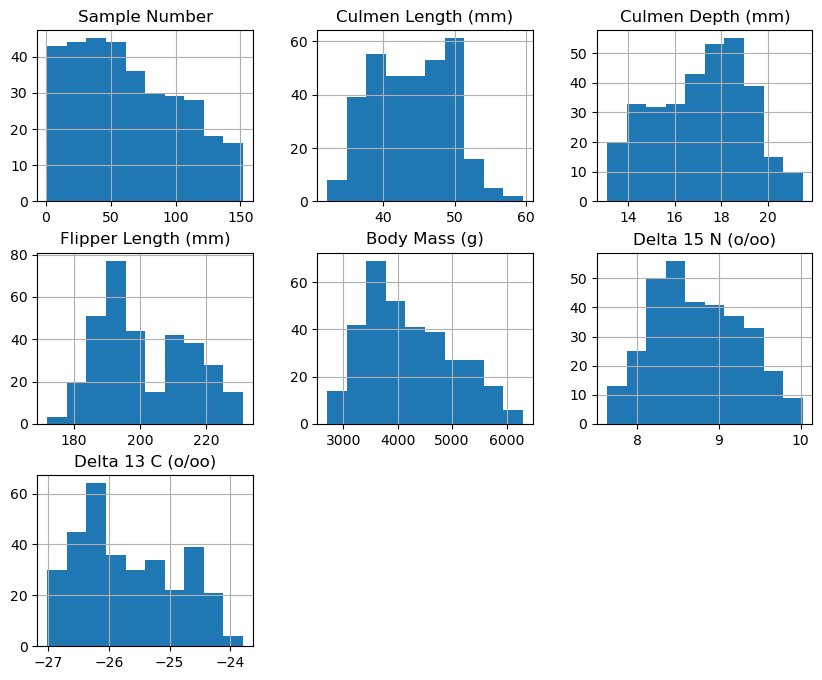

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

axes = df.hist(figsize=(10, 8))
plt.show()

df.corr() function calculates the pairwise correlation between the numerical columns.


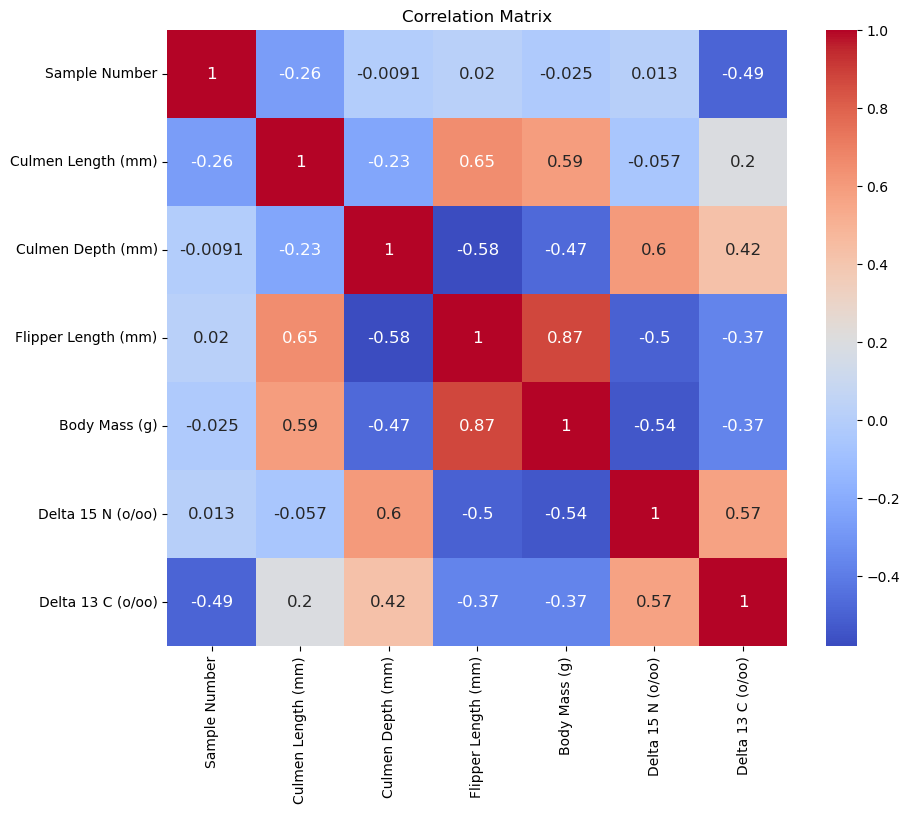

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', annot_kws={"size" : 12})
plt.title('Correlation Matrix')
plt.show()

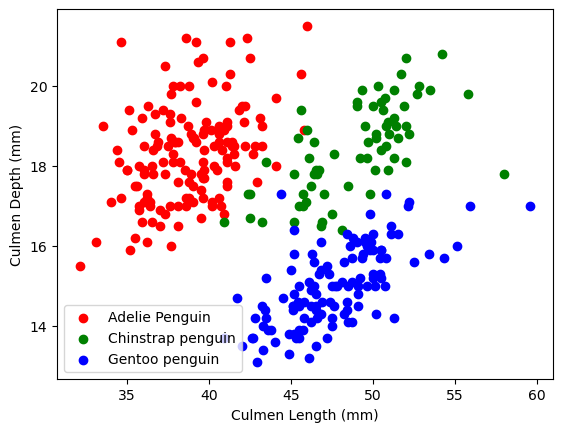

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
target = 'Species'
colors = {species : color for species, color in zip(df[target].unique(), ['r','g','b'])}

for species in df[target].unique():
    species_data =df[df[target] == species]
    plt.scatter(species_data[features[0]], species_data[features[1]], label = species, color = colors[species])
    
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

To extract a confusion matrix, and compare the performance of different models (Logistic Regression, Random Forest and SVC), 

1) the dataset is split into features and target variable.
2) The features (Culmen Length, Culmen Depth, Flipper Length and Body Mass) are selected from the dataframe
3) The dataset is split into train and test sets
4) Evaluate the performance of each of the models (Logistic Regression, Random Forest and SVC)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
y = df['Species']

In [16]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 42)

Logistic Regression

In [19]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred= rf.predict(X_test)

SVC

In [21]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)


Logistic Regression
Random Forest


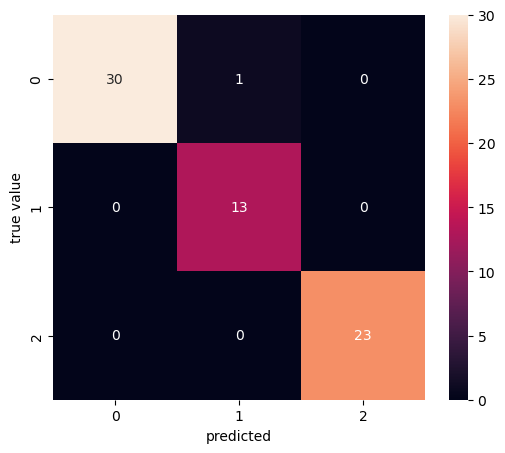

                   precision    recall  f1-score   support

   Adelie Penguin       1.00      0.97      0.98        31
Chinstrap penguin       0.93      1.00      0.96        13
   Gentoo penguin       1.00      1.00      1.00        23

         accuracy                           0.99        67
        macro avg       0.98      0.99      0.98        67
     weighted avg       0.99      0.99      0.99        67



In [31]:
print("Logistic Regression")
print("Random Forest")
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('true value')
plt.show()
print(classification_report(y_test, log_reg_pred))

Random Forest


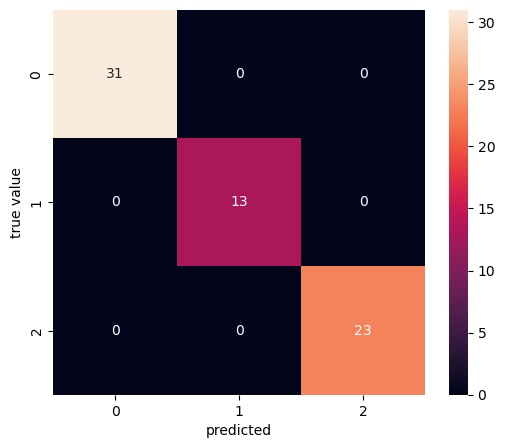

                   precision    recall  f1-score   support

   Adelie Penguin       1.00      1.00      1.00        31
Chinstrap penguin       1.00      1.00      1.00        13
   Gentoo penguin       1.00      1.00      1.00        23

         accuracy                           1.00        67
        macro avg       1.00      1.00      1.00        67
     weighted avg       1.00      1.00      1.00        67



In [32]:

print("Random Forest")
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('true value')
plt.show()

print(classification_report(y_test, rf_pred))

Random forest is the better among the three models. 
 
